# DFT(Direct linear transformation)
参照URL : https://sportict.jp/3dlt-1/

## 既知の実空間座標(X, Y, Z)
1. TL (0, 0, 0)
2. TR (0, 900, 0)
3. BR (1800, 900, 0)
4. BL (1800, 0, 0)
5. 青ペン (0, 0, 140)
6. 赤ペン (0, 900, 140)

In [1]:
# install package
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy
from IPython.display import clear_output

%matplotlib notebook

<IPython.core.display.Javascript object>


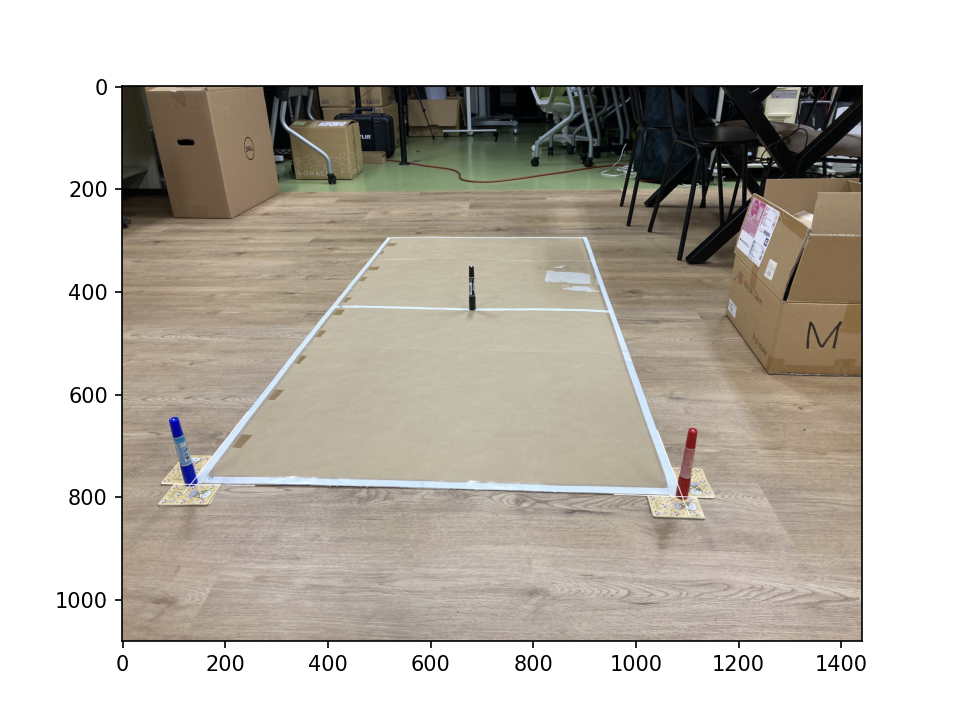

In [2]:
# phone04_camera (-900, 700, 600)
path = "images/phone04.png"
origin_img = cv2.imread(path)
plt.imshow(cv2.cvtColor(origin_img, cv2.COLOR_BGR2RGB))

In [3]:
# 既知ポイント数
POINT_NUM = 6

# 既知ポイントの画像座標
iCoords = [
    [132, 774],
    [1090, 797],
    [903, 293],
    [515, 293],
    [100, 648],
    [1110, 669]
]
# 既知ポイントの実空間座標
rCoords = [
    [0, 0, 0],
    [0, 900, 0],
    [1800, 900, 0],
    [1800, 0, 0],
    [0, 0, 140],
    [0, 900, 140]
]

In [8]:
# 計測行列について
def uArray(i):
    u = iCoords[i][0]
    return [rCoords[i][0], rCoords[i][1], rCoords[i][2], 1, 0, 0, 0, 0, -u*rCoords[i][0], -u*rCoords[i][1], -u*rCoords[i][2]]

def vArray(i):
    v = iCoords[i][1]
    return [0, 0, 0, 0, rCoords[i][0], rCoords[i][1], rCoords[i][2], 1, -v*rCoords[i][0], -v*rCoords[i][1], -v*rCoords[i][2]]

# 計測行列X
X = []
for i in range(POINT_NUM):
    X.append(uArray(i))
    X.append(vArray(i))

X = np.array(X)

In [9]:
X

array([[       0,        0,        0,        1,        0,        0,
               0,        0,        0,        0,        0],
       [       0,        0,        0,        0,        0,        0,
               0,        1,        0,        0,        0],
       [       0,      900,        0,        1,        0,        0,
               0,        0,        0,  -981000,        0],
       [       0,        0,        0,        0,        0,      900,
               0,        1,        0,  -717300,        0],
       [    1800,      900,        0,        1,        0,        0,
               0,        0, -1625400,  -812700,        0],
       [       0,        0,        0,        0,     1800,      900,
               0,        1,  -527400,  -263700,        0],
       [    1800,        0,        0,        1,        0,        0,
               0,        0,  -927000,        0,        0],
       [       0,        0,        0,        0,     1800,        0,
               0,        1,  -527400,      

In [10]:
# 画像座標ベクトルU
U = []
for i in range(POINT_NUM):
    U.append(iCoords[i][0])
    U.append(iCoords[i][1])

U = np.array(U)

In [11]:
U

array([ 132,  774, 1090,  797,  903,  293,  515,  293,  100,  648, 1110,
        669])

In [14]:
tX = X.transpose(1, 0)
tX

array([[       0,        0,        0,        0,     1800,        0,
            1800,        0,        0,        0,        0,        0],
       [       0,        0,      900,        0,      900,        0,
               0,        0,        0,        0,      900,        0],
       [       0,        0,        0,        0,        0,        0,
               0,        0,      140,        0,      140,        0],
       [       1,        0,        1,        0,        1,        0,
               1,        0,        1,        0,        1,        0],
       [       0,        0,        0,        0,        0,     1800,
               0,     1800,        0,        0,        0,        0],
       [       0,        0,        0,      900,        0,      900,
               0,        0,        0,        0,        0,      900],
       [       0,        0,        0,        0,        0,        0,
               0,        0,        0,      140,        0,      140],
       [       0,        1,        0,    

In [16]:
# DLTパラメータL
L = np.dot(np.dot(np.linalg.inv(np.dot(tX, X)), tX), U)
L

array([ 6.20375179e-02, -7.90393098e-02,  7.41981688e-01,  7.87960249e+02,
       -3.35047511e-01,  2.45788368e-01, -6.29325198e-01,  8.14828210e+02,
       -4.18959208e-05,  3.90165830e-04,  6.65668989e-04])